<a href="https://colab.research.google.com/github/Abirami1505/portfolio/blob/main/scream-detection/screaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model

# Define your folder structure
data_dir = '/content/drive/MyDrive/scream_data'
classes = [ 'NotScreaming','Screaming']

# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(128, 128)):
    data = []
    labels = []

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                data.append(mel_spectrogram)
                labels.append(i)

    return np.array(data), np.array(labels)

# Split data into training and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)
model = Model(input_layer, output_layer)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
32/32 [==============================] - 26s 781ms/step - loss: 7.3389 - accuracy: 0.6947 - val_loss: 0.6395 - val_accuracy: 0.5929
Epoch 2/100
32/32 [==============================] - 25s 774ms/step - loss: 0.5827 - accuracy: 0.6472 - val_loss: 0.6114 - val_accuracy: 0.6126
Epoch 3/100
32/32 [==============================] - 26s 823ms/step - loss: 0.5175 - accuracy: 0.6947 - val_loss: 0.6102 - val_accuracy: 0.6798
Epoch 4/100
32/32 [==============================] - 26s 820ms/step - loss: 0.4585 - accuracy: 0.7948 - val_loss: 0.6310 - val_accuracy: 0.7312
Epoch 5/100
32/32 [==============================] - 36s 1s/step - loss: 0.4025 - accuracy: 0.8246 - val_loss: 0.6882 - val_accuracy: 0.7431
Epoch 6/100
32/32 [==============================] - 26s 821ms/step - loss: 0.3116 - accuracy: 0.8474 - val_loss: 0.8046 - val_accuracy: 0.7312
Epoch 7/100
32/32 [==============================] - 26s 799ms/step - loss: 0.2382 - accuracy: 0.8940 - val_loss: 0.9573 - val_accuracy: 0.

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7351778745651245


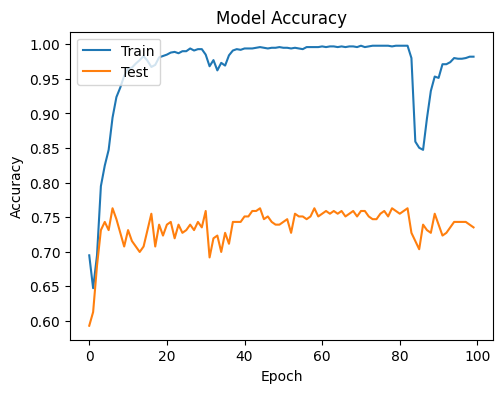

In [ ]:
import matplotlib.pyplot as plt



# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')



In [ ]:
model.save('scream_model.h5')

In [ ]:
model = load_model('scream_model.h5')

# Define the target shape for input spectrograms
target_shape = (128, 128)

# Define your class labels
classes = ['NotScreaming','Screaming']

# Function to preprocess and classify an audio file
def test_audio(file_path, model):
    # Load and preprocess the audio file
    audio_data, sample_rate = librosa.load(file_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
    mel_spectrogram = tf.reshape(mel_spectrogram, (1,) + target_shape + (1,))

    # Make predictions
    predictions = model.predict(mel_spectrogram)

    # Get the class probabilities
    class_probabilities = predictions[0]

    # Get the predicted class index
    predicted_class_index = np.argmax(class_probabilities)

    return class_probabilities, predicted_class_index

# Test an audio file
test_audio_file = '/content/ZzyWbehtt0M_out.wav' #not screaming
class_probabilities, predicted_class_index = test_audio(test_audio_file, model)

# Display results for all classes
for i, class_label in enumerate(classes):
    probability = class_probabilities[i]
    print(f'Class: {class_label}, Probability: {probability:.4f}')

# Calculate and display the predicted class and accuracy
predicted_class = classes[predicted_class_index]
accuracy = class_probabilities[predicted_class_index]
print(f'The audio is classified as: {predicted_class}')
print(f'Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 95ms/step
Class: NotScreaming, Probability: 0.9995
Class: Screaming, Probability: 0.0005
The audio is classified as: NotScreaming
Accuracy: 0.9995


In [ ]:
# Test an audio file
test_audio_file = '/content/Zz74xjBKvmE_out.wav' #screaming
class_probabilities, predicted_class_index = test_audio(test_audio_file, model)

# Display results for all classes
for i, class_label in enumerate(classes):
    probability = class_probabilities[i]
    print(f'Class: {class_label}, Probability: {probability:.4f}')

# Calculate and display the predicted class and accuracy
predicted_class = classes[predicted_class_index]
accuracy = class_probabilities[predicted_class_index]
print(f'The audio is classified as: {predicted_class}')
print(f'Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 46ms/step
Class: NotScreaming, Probability: 0.0000
Class: Screaming, Probability: 1.0000
The audio is classified as: Screaming
Accuracy: 1.0000
